In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split, TensorDataset
import matplotlib.pyplot as plt


In [7]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(1,1)
  def forward(self,x):
    x = self.fc1(x)
    return x



In [8]:
class MyDataset(Dataset):
  def __init__(self, x_data, y_data):
    self.x_data = x_data
    self.y_data = y_data

  def __len__(self):
    return len(self.x_data)

  def __getitem__(self,idx):
    return self.x_data[idx],self.y_data[idx]

In [9]:
x_data = torch.tensor(range(100)).float()
y_data = torch.tensor(range(100)).float()

dataset = MyDataset(x_data, y_data)
train_dataset, test_dataset = random_split(dataset, [80,20])

trainloader = DataLoader(train_dataset, batch_size = 1, shuffle = True)
testloader = DataLoader(test_dataset, batch_size = 1, shuffle = True)

In [10]:
# Input epoch num
num_epoch = 100

mynet = Net()

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(mynet.parameters(), lr = 0.0001)

counter = 0
for epoch in range(100):
  for inputs, targets in trainloader:

    optimizer.zero_grad()
    outputs = mynet(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
  if counter %10 == 0:
    print("epoch = ",epoch," , loss = ",loss)
  counter += 1

epoch =  0  , loss =  tensor(0.0156, grad_fn=<MseLossBackward0>)
epoch =  10  , loss =  tensor(0.0042, grad_fn=<MseLossBackward0>)
epoch =  20  , loss =  tensor(0.1276, grad_fn=<MseLossBackward0>)
epoch =  30  , loss =  tensor(0.1095, grad_fn=<MseLossBackward0>)
epoch =  40  , loss =  tensor(0.2089, grad_fn=<MseLossBackward0>)
epoch =  50  , loss =  tensor(0.0462, grad_fn=<MseLossBackward0>)
epoch =  60  , loss =  tensor(0.0260, grad_fn=<MseLossBackward0>)
epoch =  70  , loss =  tensor(0.0301, grad_fn=<MseLossBackward0>)
epoch =  80  , loss =  tensor(0.1011, grad_fn=<MseLossBackward0>)
epoch =  90  , loss =  tensor(0.0083, grad_fn=<MseLossBackward0>)


In [11]:
mynet.eval()

correct = 0
total = 0


with torch.no_grad():
  for x, y in testloader:
    pred_y = mynet(x)
    print("("+str(x)+","+str(y)+") : "+str(pred_y))




(tensor([73.]),tensor([73.])) : tensor([73.1443])
(tensor([86.]),tensor([86.])) : tensor([86.2359])
(tensor([66.]),tensor([66.])) : tensor([66.0949])
(tensor([64.]),tensor([64.])) : tensor([64.0808])
(tensor([71.]),tensor([71.])) : tensor([71.1302])
(tensor([2.]),tensor([2.])) : tensor([1.6438])
(tensor([32.]),tensor([32.])) : tensor([31.8552])
(tensor([40.]),tensor([40.])) : tensor([39.9116])
(tensor([55.]),tensor([55.])) : tensor([55.0174])
(tensor([85.]),tensor([85.])) : tensor([85.2289])
(tensor([80.]),tensor([80.])) : tensor([80.1936])
(tensor([89.]),tensor([89.])) : tensor([89.2571])
(tensor([19.]),tensor([19.])) : tensor([18.7636])
(tensor([3.]),tensor([3.])) : tensor([2.6508])
(tensor([47.]),tensor([47.])) : tensor([46.9610])
(tensor([43.]),tensor([43.])) : tensor([42.9328])
(tensor([62.]),tensor([62.])) : tensor([62.0667])
(tensor([11.]),tensor([11.])) : tensor([10.7072])
(tensor([60.]),tensor([60.])) : tensor([60.0526])
(tensor([82.]),tensor([82.])) : tensor([82.2077])


In [12]:
mynet.eval()
with torch.no_grad():
  print(mynet(torch.tensor([11.4])))

tensor([11.1100])


# Use model

In [20]:
x = torch.tensor(range(100))
x = x.float()

dataset = TensorDataset(x)
dataloader = DataLoader(dataset,batch_size = 1)

x = []
y = []
mynet.eval()
with torch.no_grad():
  for input in dataloader:
    pred_y = mynet(input[0])
    x.append(float(input[0]))
    y.append(float(pred_y[0]))

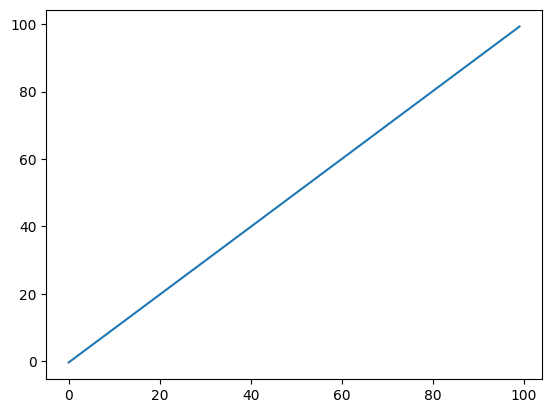

In [22]:
plt.plot(x,y)